<a href="https://colab.research.google.com/github/iamrafinawaz/Data-Analytics/blob/main/Ensemble_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


1. Bagging can be used for regression by averaging predictions from models trained on data subsets.  
2. Multiple model training combines predictions from various models, while single model training uses just one.  
3. Feature randomness ensures trees in Random Forests consider different subsets of features.  
4. OOB (Out-of-Bag) Score measures accuracy using data left out during bootstrap sampling.  
5. Feature importance is calculated by observing impurity reduction or permutation importance.  
6. Bagging Classifier combines outputs of models trained on different data subsets via bootstrap sampling.  
7. Performance of Bagging Classifier is evaluated using metrics like accuracy, precision, and recall.  
8. Bagging Regressor averages predictions from regressors trained on diverse data subsets.  
9. Ensemble techniques improve accuracy and robustness by combining multiple models.  
10. Challenges in ensembles include complexity, high computation, and difficulty in interpretation.  
11. Ensemble techniques combine multiple models to boost overall accuracy and stability.  
12. Random Forest Classifier uses multiple decision trees and aggregates predictions to classify data.  
13. Types of ensemble techniques include Bagging, Boosting, Stacking, and Voting.  
14. Ensemble learning combines multiple models to reduce errors and improve accuracy.  
15. Avoid ensembles for simple problems or when resources are limited.  
16. Bagging reduces overfitting by ensuring diversity in training data subsets.  
17. Random Forest improves over Decision Trees by reducing overfitting and enhancing robustness.  
18. Bootstrap sampling in Bagging creates varied data subsets for training multiple models.  
19. Ensemble techniques are used for fraud detection, spam filtering, medical diagnosis, and more.  
20. Bagging reduces variance by averaging predictions, while Boosting reduces bias by focusing on misclassified samples.



In [3]:
# 21
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
bagging_clf.fit(X_train, y_train)
y_pred = bagging_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [5]:
# 22
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X, y = make_regression(n_samples=500, n_features=4, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
bagging_reg = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=10, random_state=42)
bagging_reg.fit(X_train, y_train)
y_pred = bagging_reg.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))

MSE: 208.20483400386092


In [2]:
# 23
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
print("Feature Importance:", rf_clf.feature_importances_)

Feature Importance: [0.04870337 0.01359088 0.05326975 0.04755501 0.00728533 0.01394433
 0.06800084 0.10620999 0.00377029 0.00388577 0.02013892 0.00472399
 0.01130301 0.02240696 0.00427091 0.00525322 0.00938583 0.00351326
 0.00401842 0.00532146 0.07798688 0.02174901 0.06711483 0.15389236
 0.01064421 0.02026604 0.0318016  0.14466327 0.01012018 0.00521012]


In [6]:
# 24
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
dt_reg = DecisionTreeRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
dt_reg.fit(X_train, y_train)
print("Random Forest MSE:", mean_squared_error(y_test, rf_reg.predict(X_test)))
print("Decision Tree MSE:", mean_squared_error(y_test, dt_reg.predict(X_test)))

Random Forest MSE: 196.56910464619375
Decision Tree MSE: 336.29278141370037


In [8]:
# 25
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_clf_oob = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf_clf_oob.fit(X_train, y_train)
print("OOB Score:", rf_clf_oob.oob_score_)

OOB Score: 0.9166666666666666


In [10]:
# 26
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

bagging_svm = BaggingClassifier(estimator=SVC(), n_estimators=10, random_state=42)
bagging_svm.fit(X_train, y_train)
print("Accuracy:", accuracy_score(y_test, bagging_svm.predict(X_test)))

Accuracy: 1.0


In [11]:
# 27
for n_trees in [10, 50, 100]:
    rf_clf_trees = RandomForestClassifier(n_estimators=n_trees, random_state=42)
    rf_clf_trees.fit(X_train, y_train)
    y_pred_trees = rf_clf_trees.predict(X_test)
    print(f"Accuracy with {n_trees} trees:", accuracy_score(y_test, y_pred_trees))

Accuracy with 10 trees: 1.0
Accuracy with 50 trees: 1.0
Accuracy with 100 trees: 1.0


In [18]:
# 28
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=500, n_features=10, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

bagging_lr = BaggingClassifier(estimator=LogisticRegression(solver='liblinear'), n_estimators=10, random_state=42)
bagging_lr.fit(X_train, y_train)

auc_score = roc_auc_score(y_test, bagging_lr.predict_proba(X_test)[:, 1])
print("AUC Score:", auc_score)

AUC Score: 0.9452495974235106


In [20]:

# 29
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=500, n_features=10, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)


print("Feature Importance Scores:", rf_reg.feature_importances_)

Feature Importance Scores: [0.08835111 0.16543666 0.02262285 0.08276377 0.02632669 0.02137783
 0.36136479 0.18194821 0.01923195 0.03057614]


In [21]:
# 30
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

bagging_clf = BaggingClassifier(estimator=RandomForestClassifier(n_estimators=50, random_state=42), n_estimators=10, random_state=42)
bagging_clf.fit(X_train, y_train)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

bagging_accuracy = accuracy_score(y_test, bagging_clf.predict(X_test))
rf_accuracy = accuracy_score(y_test, rf_clf.predict(X_test))

print("Bagging Classifier Accuracy:", bagging_accuracy)
print("Random Forest Classifier Accuracy:", rf_accuracy)

Bagging Classifier Accuracy: 1.0
Random Forest Classifier Accuracy: 1.0


In [22]:
# 31
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
param_grid = {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
y_pred = grid_search.best_estimator_.predict(X_test)
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))

Best Parameters: {'max_depth': None, 'n_estimators': 10}
Accuracy: 1.0


In [23]:
# 32
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=500, n_features=4, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
for n_estimators in [5, 10, 20]:
    bagging_reg = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=n_estimators, random_state=42)
    bagging_reg.fit(X_train, y_train)
    print(f"Number of Base Estimators: {n_estimators}, MSE: {mean_squared_error(y_test, bagging_reg.predict(X_test))}")

Number of Base Estimators: 5, MSE: 249.81840068678338
Number of Base Estimators: 10, MSE: 197.51829708135952
Number of Base Estimators: 20, MSE: 195.44886517409049


In [24]:
# 33
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix

data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
misclassified_samples = [(i, pred, true) for i, (pred, true) in enumerate(zip(y_pred, y_test)) if pred != true]
print("Misclassified Samples:", misclassified_samples)

Misclassified Samples: []


In [25]:
# 34
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
single_tree = DecisionTreeClassifier(random_state=42)
bagging_clf.fit(X_train, y_train)
single_tree.fit(X_train, y_train)
print("Bagging Accuracy:", accuracy_score(y_test, bagging_clf.predict(X_test)))
print("Single Tree Accuracy:", accuracy_score(y_test, single_tree.predict(X_test)))

Bagging Accuracy: 1.0
Single Tree Accuracy: 1.0


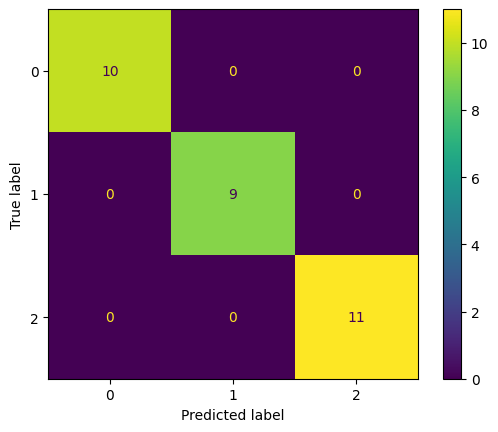

In [26]:
# 35
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [27]:
# 36
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

stacking_clf = StackingClassifier(estimators=[
    ('dt', DecisionTreeClassifier()),
    ('svm', SVC(probability=True)),
    ('lr', LogisticRegression(solver='liblinear'))
], final_estimator=LogisticRegression())
stacking_clf.fit(X_train, y_train)
print("Stacking Accuracy:", accuracy_score(y_test, stacking_clf.predict(X_test)))

Stacking Accuracy: 1.0


In [28]:
# 37
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
feature_importances = rf_clf.feature_importances_
top_5_features = sorted(enumerate(feature_importances), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 Features:", top_5_features)

Top 5 Features: [(2, np.float64(0.43999397414456937)), (3, np.float64(0.4215215887397244)), (0, np.float64(0.10809762464246378)), (1, np.float64(0.030386812473242528))]


In [29]:
# 38
from sklearn.metrics import precision_score, recall_score, f1_score

bagging_clf.fit(X_train, y_train)
y_pred = bagging_clf.predict(X_test)
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [30]:
# 39
for max_depth in [None, 10, 20]:
    rf_clf = RandomForestClassifier(max_depth=max_depth, random_state=42)
    rf_clf.fit(X_train, y_train)
    print(f"Max Depth: {max_depth}, Accuracy: {accuracy_score(y_test, rf_clf.predict(X_test))}")

Max Depth: None, Accuracy: 1.0
Max Depth: 10, Accuracy: 1.0
Max Depth: 20, Accuracy: 1.0


In [31]:
# 40
for estimator in [DecisionTreeRegressor(), KNeighborsRegressor()]:
    bagging_reg = BaggingRegressor(estimator=estimator, n_estimators=10, random_state=42)
    bagging_reg.fit(X_train, y_train)
    print(f"Base Estimator: {type(estimator).__name__}, MSE: {mean_squared_error(y_test, bagging_reg.predict(X_test))}")

Base Estimator: DecisionTreeRegressor, MSE: 0.0006666666666666678
Base Estimator: KNeighborsRegressor, MSE: 0.007493333333333321


In [32]:
# 41
from sklearn.metrics import roc_auc_score

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
print("ROC-AUC Score:", roc_auc_score(y_test, rf_clf.predict_proba(X_test), multi_class='ovr'))

ROC-AUC Score: 1.0


In [33]:
# 42
from sklearn.model_selection import cross_val_score

bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
scores = cross_val_score(bagging_clf, X, y, cv=5)
print("Cross-Validation Scores:", scores)

Cross-Validation Scores: [0.96666667 0.96666667 0.9        0.93333333 1.        ]


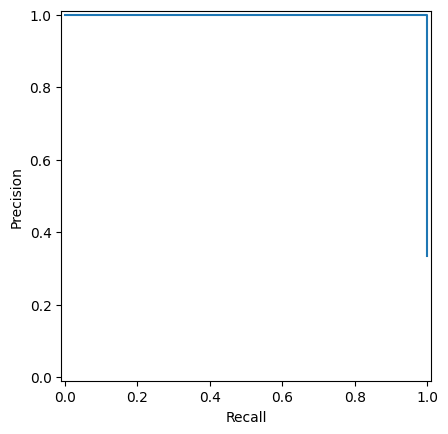

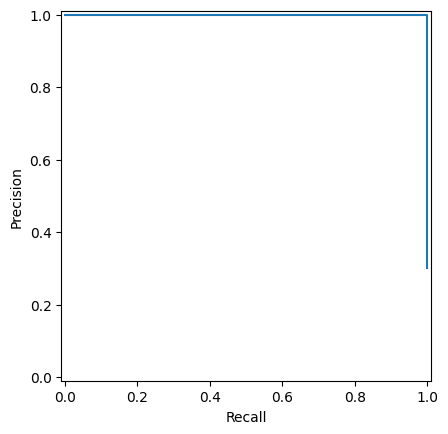

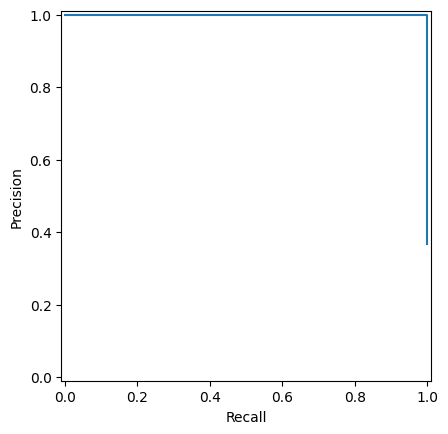

In [36]:
# 43
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.preprocessing import label_binarize

y_binarized = label_binarize(y_test, classes=[0, 1, 2])

for i in range(y_binarized.shape[1]):
    precision, recall, _ = precision_recall_curve(y_binarized[:, i], y_scores[:, i])
    PrecisionRecallDisplay(precision=precision, recall=recall).plot()

In [37]:
# 44
stacking_clf = StackingClassifier(estimators=[
    ('rf', RandomForestClassifier(n_estimators=50)),
    ('lr', LogisticRegression(solver='liblinear'))
], final_estimator=LogisticRegression())
stacking_clf.fit(X_train, y_train)
print("Stacking Accuracy:", accuracy_score(y_test, stacking_clf.predict(X_test)))

Stacking Accuracy: 1.0


In [38]:
# 45
for bootstrap in [True, False]:
    bagging_reg = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=10, bootstrap=bootstrap, random_state=42)
    bagging_reg.fit(X_train, y_train)
    print(f"Bootstrap: {bootstrap}, MSE: {mean_squared_error(y_test, bagging_reg.predict(X_test))}")

Bootstrap: True, MSE: 0.0006666666666666678
Bootstrap: False, MSE: 0.0
